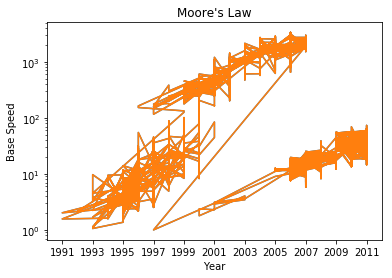

In [11]:
# Moore's Law

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.metrics
import numpy as np

data = pd.read_csv('summaries.txt')
data = data.drop(['testID','tester','machine','cpu','mhz','os','compiler',
                  'autoParallel','benchType','peak'],axis=1)
data['hwAvail'] = data['hwAvail'].str.strip('AaBbCcDdEeFfGgHhIiJjKkLlMmNnOoPpQqRrSsTtUuVvWwXxYyZz-')

X = data['hwAvail']
Y = data['base'] # Base speed as dependent variable

YEARS = [1991, 1993, 1995, 1997, 1999, 2001, 2003, 2005, 2007, 2009, 2011]

plt.semilogy(X, Y)
plt.xlabel("Year")
plt.ylabel("Base Speed")
plt.xticks(YEARS)
plt.title('Moore\'s Law')
plt.show()

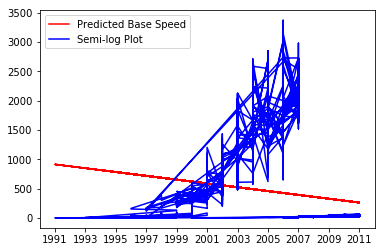

The R^2 score for the linear regression model is: -5590.80
The Mean Squared Error is: 472232.07


In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(data['hwAvail'].values.reshape(-1,1),
                                                    data['base'].values.reshape(-1,1),
                                                    test_size=0.33, random_state=42)

reg = linear_model.LinearRegression()
reg = reg.fit(X_train, Y_train)

pred = reg.predict(X_test)
score = reg.score(pred, Y_test)
MSE = sklearn.metrics.mean_squared_error(Y_test,pred)

plt.plot(X_test,pred,color='r',label='Predicted Base Speed')
plt.plot(X,Y,color='b',label="Semi-log Plot")
plt.legend()
plt.xticks(YEARS)
plt.show()

print "The R^2 score for the linear regression model is: %.2f" % score
print "The Mean Squared Error is: %.2f" % MSE